In [96]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim
import torch.utils.data
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.autograd import Variable
import torch.nn.functional as F

In [98]:
transform = transforms.Compose(
    [transforms.Scale(32),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [99]:
trainset = datasets.MNIST(root='./data', train = True,
                                       download = True, transform = transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

In [100]:
testset = datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

In [101]:
classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

    8     4     0     6


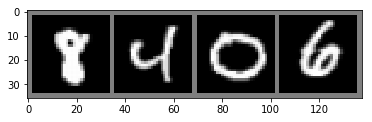

In [102]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

GroundTruth:      7     2     1     0


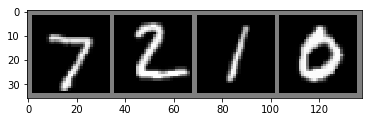

In [103]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [104]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool  = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16 * 5 * 5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [105]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [107]:
for epoch in range(2):
    print ('Training at epoch = ', epoch)
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        #get the inputs
        inputs, labels = data
        
        #wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)
        
        optimizer.zero_grad()
        
        #forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        #print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss / 200))
            running_loss = 0.0
            
            
print('Finished Training')

Training at epoch =  0
[1,  2000] loss: 1.585
[1,  4000] loss: 1.203
[1,  6000] loss: 1.055
[1,  8000] loss: 0.971
[1, 10000] loss: 0.848
[1, 12000] loss: 0.751
[1, 14000] loss: 0.698
Training at epoch =  1
[2,  2000] loss: 0.576
[2,  4000] loss: 0.483
[2,  6000] loss: 0.534
[2,  8000] loss: 0.470
[2, 10000] loss: 0.435
[2, 12000] loss: 0.555
[2, 14000] loss: 0.505
Finished Training


GroundTruth:      7     2     1     0


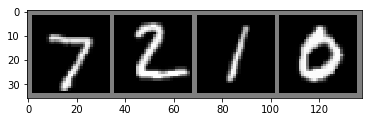

In [108]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [109]:
output = net(Variable(images))

In [110]:
_, predicted = torch.max(output.data, 1)

In [114]:
print('Predicted: ', ' '.join('%5s' % classes[predicted[j][0]]
                              for j in range(4)))

Predicted:      3     4     5     6


In [115]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print(' Accuracy of the network on the 10000 test images: %d %%' % 
      (100 * correct / total))

 Accuracy of the network on the 10000 test images: 98 %


In [116]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 99 %
Accuracy of     1 : 99 %
Accuracy of     2 : 98 %
Accuracy of     3 : 99 %
Accuracy of     4 : 99 %
Accuracy of     5 : 97 %
Accuracy of     6 : 98 %
Accuracy of     7 : 98 %
Accuracy of     8 : 98 %
Accuracy of     9 : 95 %
